In [1]:
import numpy as np
from torch import nn
import torch
import matplotlib.pyplot as plt
import os
import run_utils
import sys
import glob
from natsort import natsorted

In [2]:
from models.backbone import resnet18


sys.path.append("../../")
from mftma.manifold_analysis_correlation import manifold_analysis_corr
from mftma.utils.make_manifold_data import make_manifold_data
from mftma.utils.activation_extractor import extractor

In [8]:
weight_files = natsorted(glob.glob("../backbone*.pth"))

In [ ]:
project_name = "yipeng_mftma"

In [10]:
device = torch.device("cuda:0")

In [ ]:
metrics = {}

for i in range(len(weight_files)):
    print(i, weight_files[i])

    model = resnet18(norm="gn")

    model.fc = nn.Identity()
    ckpt = torch.load(weight_files[i])
    model.load_state_dict(ckpt)

    model.fc = nn.Identity()

    model = model.to(device)
    capacities, radii, dimensions, correlations, names = run_utils.get_manifold_metrics(
        model
    )

    metrics.update(
        {
            f"task_{i}": {
                "capacities": capacities,
                "radii": radii,
                "dimensions": dimensions,
                "correlations": correlations,
                "names": names,
            }
        }
    )

    if not os.path.exists(f"./plots/{project_name}"):
        os.makedirs(f"./plots/{project_name}")

    torch.save(metrics, f"./plots/{project_name}/EWC_simCLR_CIFAR100_metrics.pth")
    # break

In [13]:
import matplotlib.pyplot as plt
import torch

data_file = "./plots/yipeng_mftma_EWC/EWC_simCLR_CIFAR100_metrics.pth"
plot_data = torch.load(data_file)

In [14]:
k = list(plot_data.keys())

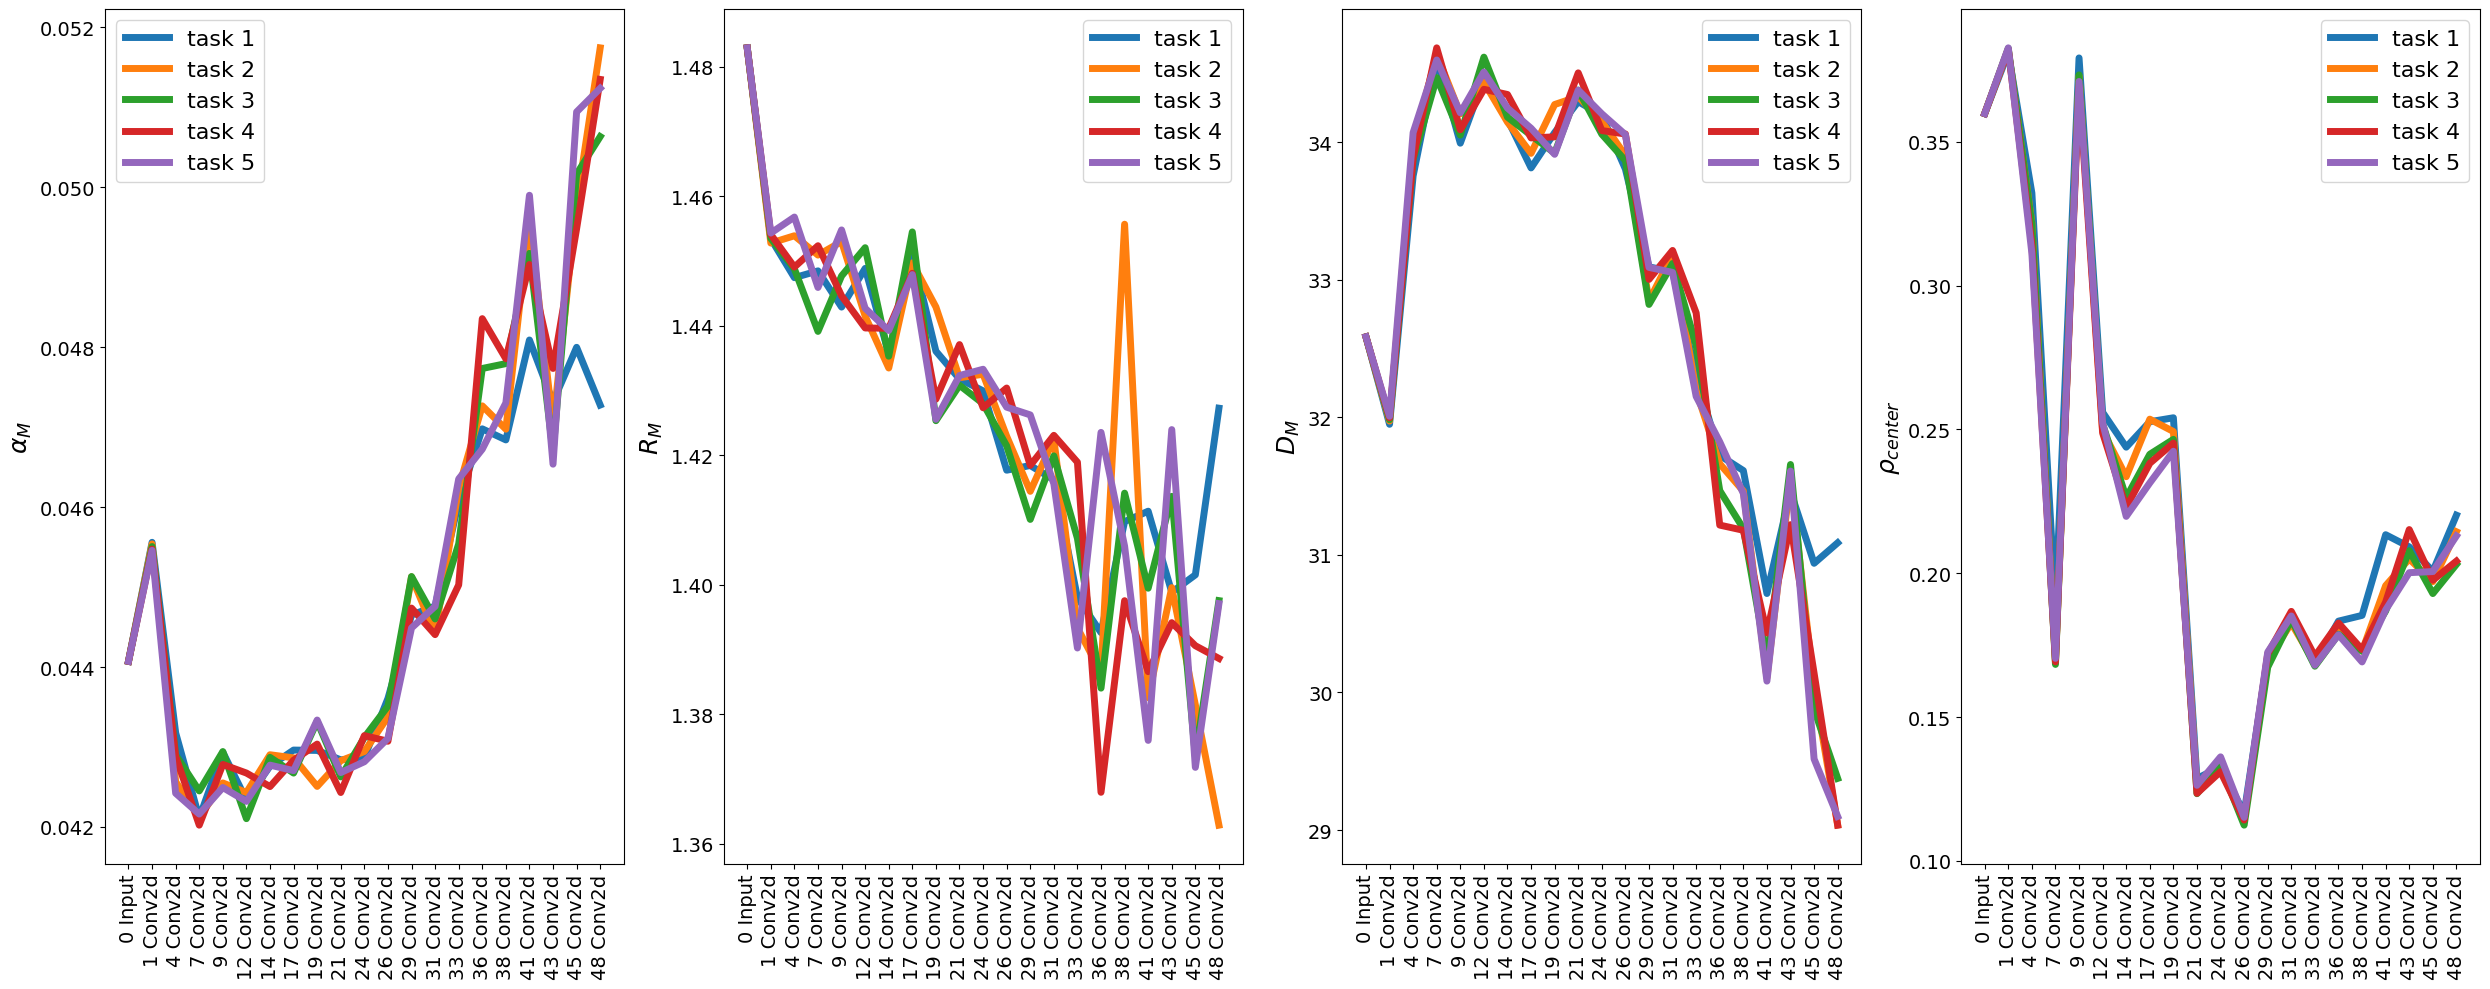

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(25, 10), tight_layout=True)

for i in range(5):

    axes[0].plot(plot_data[k[i]]["capacities"], linewidth=5, label=f"task {i+1}")
    axes[1].plot(plot_data[k[i]]["radii"], linewidth=5, label=f"task {i+1}")
    axes[2].plot(plot_data[k[i]]["dimensions"], linewidth=5, label=f"task {i+1}")
    axes[3].plot(plot_data[k[i]]["correlations"], linewidth=5, label=f"task {i+1}")

    axes[0].set_ylabel(r"$\alpha_M$", fontsize=18)
    axes[1].set_ylabel(r"$R_M$", fontsize=18)
    axes[2].set_ylabel(r"$D_M$", fontsize=18)
    axes[3].set_ylabel(r"$\rho_{center}$", fontsize=18)

    names = plot_data[k[i]]["names"]
    names = [n.split("_")[1] + " " + n.split("_")[2] for n in names]
    for ax in axes:
        ax.set_xticks([i for i, _ in enumerate(names)])
        ax.set_xticklabels(names, rotation=90, fontsize=16)
        ax.tick_params(axis="both", which="major", labelsize=14)
    axes[0].legend(fontsize=16)
    axes[1].legend(fontsize=16)
    axes[2].legend(fontsize=16)
    axes[3].legend(fontsize=16)


plt.savefig(
    f"./plots/yipeng_mftma_naive/naive_simCLR_CIFAR100_metrics.png",
    dpi=300,
    bbox_inches="tight",
)

<Figure size 640x480 with 0 Axes>

In [14]:
# activations_pruned = {"layer_0_Input": activations["layer_0_Input"]}

In [13]:
# fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# axes[0].plot(capacities, linewidth=5)
# axes[1].plot(radii, linewidth=5)
# axes[2].plot(dimensions, linewidth=5)
# axes[3].plot(correlations, linewidth=5)

# axes[0].set_ylabel(r"$\alpha_M$", fontsize=18)
# axes[1].set_ylabel(r"$R_M$", fontsize=18)
# axes[2].set_ylabel(r"$D_M$", fontsize=18)
# axes[3].set_ylabel(r"$\rho_{center}$", fontsize=18)

# names = list(activations.keys())
# names = [n.split("_")[1] + " " + n.split("_")[2] for n in names]
# for ax in axes:
#     ax.set_xticks([i for i, _ in enumerate(names)])
#     ax.set_xticklabels(names, rotation=90, fontsize=16)
#     ax.tick_params(axis="both", which="major", labelsize=14)

# plt.tight_layout()
# plt.show()